# 根据确定难度顺序的地图看一下当前图指标信息

In [ ]:
save_path = "maps_start_from_empty_2022-11-26_13_39_10_949504"

# Step1, 随机生成一张6层地图，优化它的连通性

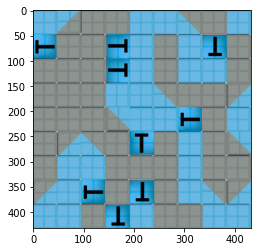

In [1]:
import fastwfc
import matplotlib.pyplot as plt
from map2graph import map2digraph, get_map_shortest_length_dist, tiles2data, get_all_pair_shortest_path
# from graph_analysis import DiGraphStats
wfc = fastwfc.XLandWFC("samples.xml")
ids, img = wfc.generate(out_img=True)
wave = wfc.wave_from_id(ids)
plt.imshow(img)
plt.pause(0.01)

In [3]:
import numpy as np
def get_no_path_pair_rate(ids):
    DG = map2digraph(tiles2data(ids))
    all_pair_shortest_path, all_pair_shortest_path_dict = get_all_pair_shortest_path(DG, return_dict=True)
    all_pair_length = []
    for pair in all_pair_shortest_path:
        all_pair_length.append(len(pair))
    no_path_pair_count = 0
    for i in DG.nodes:
        for j in DG.nodes:
            if i!=j and j not in all_pair_shortest_path_dict[i].keys():
                no_path_pair_count += 1
    no_path_pair_rate = no_path_pair_count /(len(DG.nodes)**2)
    return no_path_pair_rate, np.mean(all_pair_length)

In [4]:
rate,_ = get_no_path_pair_rate(ids)
target_rate = 0
min_rate = 1000
iter_count = 100
count = 0
base_wave = wave
while count < iter_count:
    count+=1
    new_ids, _ = wfc.mutate(base_wave=base_wave,new_weight=80,iter_count=1,out_img=False)
    new_rate, _ = get_no_path_pair_rate(new_ids)
    if new_rate < min_rate:
        min_rate = new_rate
        min_rate_ids = new_ids
        base_wave = wfc.wave_from_id(new_ids)
        print(count, min_rate)


1 0.6401463191586648
5 0.20865721688766956
25 0.1700960219478738
63 0.15881725346745923
64 0.1301630848955952


In [3]:
# new_wave = wfc.wave_from_id(min_rate_ids)
new_wave = wfc.wave_from_id(ids)
from WFCUnity3DEnv_fastwfc import WFCUnity3DEnv
# unity3d_env = WFCUnity3DEnv(file_name="/Users/yinzi/Downloads/1126_mac_build_faswfc.app/Contents/MacOS/tilemap_render")
unity3d_env = WFCUnity3DEnv()
unity3d_env.set_wave(new_wave)
unity3d_env.render_in_unity()

/Users/yinzi/miniforge3/lib/python3.9/site-packages/requests/__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.0.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


Trying to connect to 0.0.0.0:30051
reset world and agent
